# Unit 5 - Financial Planning

In [418]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [419]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner



### Collect Crypto Prices Using the `requests` Library

In [420]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [421]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [422]:
# Fetch current BTC price
request_url_btc = requests.get(btc_url).json()
request_url_btc 



# Fetch current ETH price
request_url_eth = requests.get(eth_url).json()
request_url_eth

btc_price = request_url_btc['data']['1']['quotes']['USD']['price']
btc_price

eth_price = request_url_eth['data']['1027']['quotes']['USD']['price']
eth_price

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $61905.60
The current value of your 5.3 ETH is $18729.56


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [423]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [424]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')




In [425]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [426]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-05", tz= "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

start=pd.Timestamp("2017-10-05", tz= "America/New_York").isoformat()
end=pd.Timestamp("2021-10-05", tz= "America/New_York").isoformat()
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_ticker=alpaca.get_barset(
    tickers,
    timeframe,
    start=start,
    end=end,
    limit=1000,
).df

# Preview DataFrame
df_ticker

AGG                                       \
                             open     high      low   close     volume   
time                                                                     
2017-10-13 00:00:00-04:00  109.82  109.870  109.690  109.85  1573645.0   
2017-10-16 00:00:00-04:00  109.75  109.810  109.660  109.74  3556213.0   
2017-10-17 00:00:00-04:00  109.62  109.740  109.550  109.70  1638086.0   
2017-10-18 00:00:00-04:00  109.51  109.560  109.460  109.53  1511319.0   
2017-10-19 00:00:00-04:00  109.71  109.750  109.540  109.61  1747693.0   
...                           ...      ...      ...     ...        ...   
2021-09-29 00:00:00-04:00  114.97  115.060  114.715  114.85  5099586.0   
2021-09-30 00:00:00-04:00  114.77  114.860  114.690  114.83  4461194.0   
2021-10-01 00:00:00-04:00  114.82  115.060  114.790  115.02  6840179.0   
2021-10-04 00:00:00-04:00  114.92  115.030  114.795  114.94  3969883.0   
2021-10-05 00:00:00-04:00  114.82  114.867  114.610  114.65  6211634.0   

                              SPY                                         
                             open      high     low   close       volume  
time                                                                      
2017-10-13 00:00:00-04:00     NaN       NaN     NaN     NaN          NaN  
2017-10-16 00:00:00-04:00  255.21  255.5100  254.82  255.30   25720677.0  
2017-10-17 00:00:00-04:00  255.24  255.5200  254.98  255.46   23608473.0  
2017-10-18 00:00:00-04:00  255.90  255.9500  255.50  255.69   25173613.0  
2017-10-19 00:00:00-04:00  254.82  255.8200  254.35  255.82   41439302.0  
...                           ...       ...     ...     ...          ...  
2021-09-29 00:00:00-04:00  435.19  437.0400  433.85  434.44   69828191.0  
2021-09-30 00:00:00-04:00  436.02  436.7700  428.78  429.17  115315276.0  
2021-10-01 00:00:00-04:00  430.98  436.0329  427.24  434.19  110774792.0  
2021-10-04 00:00:00-04:00  433.00  433.9600  426.36  428.69  112134374.0  
2021-10-05 00:00:00-04:00  430.24  435.4900  429.39  433.05   82381830.0  

[1001 rows x 10 columns]

In [427]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price= df_ticker["AGG"]["close"]
spy_close_price= df_ticker["SPY"]["close"]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price[-1]}")
print(f"Current SPY closing price: ${spy_close_price[-1]}")

Current AGG closing price: $114.65
Current SPY closing price: $433.05


In [428]:
# Compute the current value of shares
my_agg_value=agg_close_price[-1]*my_agg
my_spy_value=spy_close_price[-1]*my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21652.50
The current value of your 200 AGG shares is $22930.00


### Savings Health Analysis

In [429]:
# Set monthly household income
monthly_income= 12000

# Consolidate financial assets data
holding=["crypto","shares"]
amount= [(my_btc_value + my_eth_value),(my_spy_value+my_agg_value)]

# Create savings DataFrame
df_savings = pd.DataFrame({'amount':amount},index=holding)

# Display savings DataFrame
#display(df_savings)
display(df_savings)

,amount
crypto,80635.164
shares,44582.500


<AxesSubplot:ylabel='amount'>

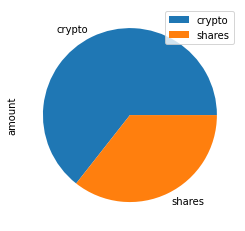

In [430]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [431]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings
total_savings = df_savings.loc['crypto']['amount'] + df_savings.loc['shares']['amount']
total_savings

# Validate saving health
if total_savings   > emergency_fund:
    print("Congratulation for having enough money for an emrgency")
elif total_savings >= emergency_fund:
    print("Congratulation for reaching your goal")
else: 
    print(f"you need ${Emergency_amount_fund} amount to reach you goal")

Congratulation for having enough money for an emrgency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [432]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [433]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2016-10-05", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-05", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["SPY","AGG"]

# Get 5 year's worth of historical price data
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000,
).df

# Display sample data
df_ticker.sort_index()
# Display sample data
df_ticker.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2016-10-13 00:00:00-04:00  111.60  111.68  111.5250  111.570  1651166.0   
2016-10-14 00:00:00-04:00  111.47  111.61  111.3300  111.335  2277119.0   
2016-10-17 00:00:00-04:00  111.45  111.61  111.3850  111.550  1428265.0   
2016-10-18 00:00:00-04:00  111.54  111.74  111.4683  111.720  1376448.0   
2016-10-19 00:00:00-04:00  111.68  111.83  111.6400  111.790  1348695.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-10-13 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-10-14 00:00:00-04:00  214.16  214.69  213.03  213.09  71665455.0  
2016-10-17 00:00:00-04:00  213.09  213.39  212.17  212.40  48268082.0  
2016-10-18 00:00:00-04:00  214.26  214.31  213.27  213.69  55643301.0  
2016-10-19 00:00:00-04:00  214.03  214.64  213.60  214.25  47063555.0

In [434]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Thirtyyear = MCSimulation(
 portfolio_data = df_ticker,
 weights = [.6,.4],
 num_simulation = 500,
 num_trading_days = 252*30
)
MC_Thirtyyear

In [435]:
# Printing the simulation input data
MC_Thirtyyear.portfolio_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2016-10-13 00:00:00-04:00  111.60  111.68  111.5250  111.570  1651166.0   
2016-10-14 00:00:00-04:00  111.47  111.61  111.3300  111.335  2277119.0   
2016-10-17 00:00:00-04:00  111.45  111.61  111.3850  111.550  1428265.0   
2016-10-18 00:00:00-04:00  111.54  111.74  111.4683  111.720  1376448.0   
2016-10-19 00:00:00-04:00  111.68  111.83  111.6400  111.790  1348695.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-10-13 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-10-14 00:00:00-04:00    -0.002106  214.16  214.69  213.03  213.09   
2016-10-17 00:00:00-04:00     0.001931  213.09  213.39  212.17  212.40   
2016-10-18 00:00:00-04:00     0.001524  214.26  214.31  213.27  213.69   
2016-10-19 00:00:00-04:00     0.000627  214.03  214.64  213.60  214.25   

                                                    
                               volume daily_return  
time                                                
2016-10-13 00:00:00-04:00         NaN          NaN  
2016-10-14 00:00:00-04:00  71665455.0          NaN  
2016-10-17 00:00:00-04:00  48268082.0    -0.003238  
2016-10-18 00:00:00-04:00  55643301.0     0.006073  
2016-10-19 00:00:00-04:00  47063555.0     0.002621

In [436]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/bashirshah/Documents/Bashir's Files/FINTECHBOOTCAMP/RUT-SOM-VIRT-FIN-PT-08-2021-U-C-master 2/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998694,1.009766,0.991881,0.998787,0.985909,0.999204,0.999445,1.001129,0.996566,1.004172,...,1.005891,1.001981,0.994437,1.003472,0.996259,0.998519,0.997350,1.010568,1.001303,1.003768
2,0.995524,1.016395,0.989842,0.990622,0.986508,0.993447,0.996660,0.999654,1.001939,0.998587,...,1.008075,1.008449,0.994362,1.008285,0.996803,0.996361,0.994649,1.008890,1.000533,1.008364
3,0.997906,1.012559,0.990714,0.993335,0.982431,0.997456,1.000861,1.006033,1.002631,0.999258,...,1.006428,0.999465,0.996582,1.006441,0.996933,1.000778,0.992210,1.001168,1.003963,1.015624
4,0.999501,1.009964,0.989785,0.991712,0.975850,0.993753,1.008307,1.011048,1.012167,1.001061,...,1.006851,1.000140,0.992728,1.004158,0.986315,1.006156,0.989552,1.006506,1.000932,1.014444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.095206,5.747498,4.336045,4.766752,7.879895,5.214164,6.313121,3.916527,23.220781,10.792276,...,8.586156,5.606671,7.747149,11.505713,15.365437,3.507936,8.597535,9.585854,5.572155,3.149470
7557,6.074354,5.672882,4.323915,4.724038,7.911817,5.209425,6.339375,3.886733,23.233462,10.717727,...,8.627480,5.588871,7.656308,11.446124,15.247408,3.542184,8.531165,9.672492,5.571958,3.143038
7558,6.014289,5.664148,4.280595,4.739058,7.851185,5.192578,6.397240,3.882801,23.247134,10.711722,...,8.600088,5.642581,7.664906,11.428648,15.136206,3.552506,8.590828,9.700291,5.585627,3.164755
7559,6.008519,5.645687,4.310012,4.729221,7.844920,5.198649,6.357146,3.881275,23.271652,10.749309,...,8.680054,5.615098,7.762930,11.504183,15.101697,3.596410,8.584328,9.637154,5.521513,3.187932


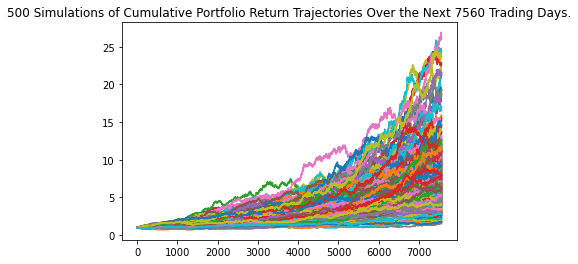

In [417]:
# Plot simulation outcomes
line_plot = MC_Thirtyyear.plot_simulation()

line_plot.get_figure().savefig("MC_Thirtyyear_sim_plot.png", bbox_inches="tight")

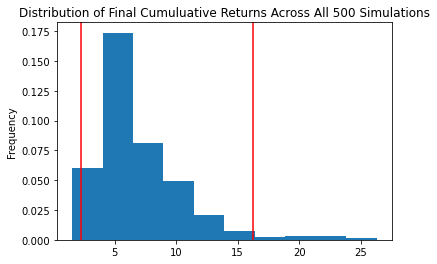

In [368]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Thirtyyear.plot_distribution()

### Retirement Analysis

In [437]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)


count           500.000000
mean              6.880108
std               3.466956
min               1.064754
25%               4.414530
50%               6.102919
75%               8.560153
max              23.343955
95% CI Lower      2.518596
95% CI Upper     15.693356
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [438]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $50371.92 and $313867.12


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [439]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $75557.88 and $470800.68


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [440]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_5iveyear = MCSimulation(
 portfolio_data = df_ticker,
 weights = [.9,.1],
 num_simulation = 500,
 num_trading_days = 252*5
)
MC_5iveyear

In [441]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5iveyear.portfolio_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2016-10-13 00:00:00-04:00  111.60  111.68  111.5250  111.570  1651166.0   
2016-10-14 00:00:00-04:00  111.47  111.61  111.3300  111.335  2277119.0   
2016-10-17 00:00:00-04:00  111.45  111.61  111.3850  111.550  1428265.0   
2016-10-18 00:00:00-04:00  111.54  111.74  111.4683  111.720  1376448.0   
2016-10-19 00:00:00-04:00  111.68  111.83  111.6400  111.790  1348695.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-10-13 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-10-14 00:00:00-04:00    -0.002106  214.16  214.69  213.03  213.09   
2016-10-17 00:00:00-04:00     0.001931  213.09  213.39  212.17  212.40   
2016-10-18 00:00:00-04:00     0.001524  214.26  214.31  213.27  213.69   
2016-10-19 00:00:00-04:00     0.000627  214.03  214.64  213.60  214.25   

                                                    
                               volume daily_return  
time                                                
2016-10-13 00:00:00-04:00         NaN          NaN  
2016-10-14 00:00:00-04:00  71665455.0          NaN  
2016-10-17 00:00:00-04:00  48268082.0    -0.003238  
2016-10-18 00:00:00-04:00  55643301.0     0.006073  
2016-10-19 00:00:00-04:00  47063555.0     0.002621

In [442]:
MC_5iveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/bashirshah/Documents/Bashir's Files/FINTECHBOOTCAMP/RUT-SOM-VIRT-FIN-PT-08-2021-U-C-master 2/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002673,1.000814,0.997653,0.997793,0.999639,0.997852,0.998506,0.997442,1.004185,0.996751,...,1.001667,0.999774,0.995043,0.999544,0.999777,1.004053,0.998973,0.994309,0.998229,1.001870
2,1.004507,0.998236,0.994333,0.999846,1.004225,0.995959,0.997371,0.997235,1.005148,0.995801,...,1.001698,0.995965,0.996010,0.999248,0.995099,1.002620,0.996123,1.000204,0.997688,1.002517
3,1.004534,0.997482,0.991235,0.995466,1.002732,0.992623,0.993347,0.998283,1.008410,0.996359,...,1.000218,0.993245,1.001931,0.998682,0.993860,1.002281,0.993336,1.001997,0.999830,1.005183
4,1.002105,0.998072,0.990260,0.999161,1.001628,0.993807,0.985812,1.000708,1.007438,1.002740,...,1.003457,0.993155,1.001801,0.994645,0.991706,1.002318,0.992804,1.005961,0.998469,1.007926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.010854,0.919689,1.045932,1.022604,1.135725,1.133780,1.185929,1.113783,1.183735,1.110454,...,1.230223,1.273123,1.117193,1.055619,1.065420,1.129745,1.093759,1.327996,0.979642,1.097130
1257,1.013267,0.914744,1.042123,1.026242,1.137735,1.134639,1.184480,1.107351,1.187819,1.110523,...,1.232278,1.267760,1.120369,1.053367,1.069316,1.128475,1.093231,1.333862,0.982580,1.099616
1258,1.015088,0.912982,1.039424,1.031976,1.143317,1.135530,1.181788,1.111017,1.191352,1.106185,...,1.229500,1.265653,1.115617,1.050214,1.067941,1.132101,1.092055,1.338131,0.979505,1.097908
1259,1.010479,0.913227,1.038737,1.034569,1.139497,1.136322,1.185513,1.109778,1.185818,1.104240,...,1.222671,1.267316,1.110373,1.052635,1.064738,1.136590,1.092944,1.335208,0.978523,1.096328


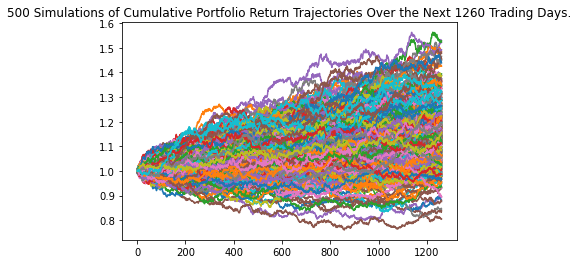

In [375]:
# Plot simulation outcomes
line_plot = MC_5iveyear.plot_simulation()

line_plot.get_figure().savefig("MC_5iveyear_sim_plot.png", bbox_inches="tight")

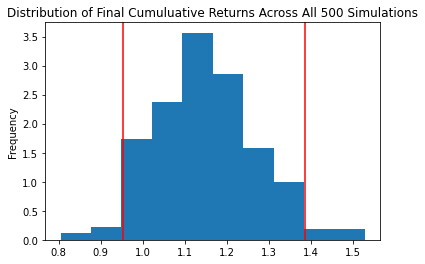

In [376]:
# Plot probability distribution and confidence intervals
dist_plot1 = MC_5iveyear.plot_distribution()

In [443]:
# Fetch summary statistics from the Monte Carlo simulation results
tb5 = MC_5iveyear.summarize_cumulative_return()

# Print summary statistics
print(tb5)

count           500.000000
mean              1.145904
std               0.135289
min               0.809321
25%               1.060120
50%               1.138202
75%               1.225433
max               1.611555
95% CI Lower      0.883802
95% CI Upper      1.438484
Name: 1260, dtype: float64


In [445]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5ive = round(tb5[8]*60000,2)
ci_upper_5ive = round(tb5[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5ive} and ${ci_upper_5ive}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53028.12 and $86309.06


### Ten Years Retirement Option

In [446]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
 portfolio_data = df_ticker,
 weights = [.9,.1],
 num_simulation = 500,
 num_trading_days = 252*10
)
MC_10year

In [447]:
MC_10year.portfolio_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2016-10-13 00:00:00-04:00  111.60  111.68  111.5250  111.570  1651166.0   
2016-10-14 00:00:00-04:00  111.47  111.61  111.3300  111.335  2277119.0   
2016-10-17 00:00:00-04:00  111.45  111.61  111.3850  111.550  1428265.0   
2016-10-18 00:00:00-04:00  111.54  111.74  111.4683  111.720  1376448.0   
2016-10-19 00:00:00-04:00  111.68  111.83  111.6400  111.790  1348695.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-10-13 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-10-14 00:00:00-04:00    -0.002106  214.16  214.69  213.03  213.09   
2016-10-17 00:00:00-04:00     0.001931  213.09  213.39  212.17  212.40   
2016-10-18 00:00:00-04:00     0.001524  214.26  214.31  213.27  213.69   
2016-10-19 00:00:00-04:00     0.000627  214.03  214.64  213.60  214.25   

                                                    
                               volume daily_return  
time                                                
2016-10-13 00:00:00-04:00         NaN          NaN  
2016-10-14 00:00:00-04:00  71665455.0          NaN  
2016-10-17 00:00:00-04:00  48268082.0    -0.003238  
2016-10-18 00:00:00-04:00  55643301.0     0.006073  
2016-10-19 00:00:00-04:00  47063555.0     0.002621

In [448]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/bashirshah/Documents/Bashir's Files/FINTECHBOOTCAMP/RUT-SOM-VIRT-FIN-PT-08-2021-U-C-master 2/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999444,1.006997,0.996234,1.001065,1.001149,0.999907,1.002878,1.003206,0.998870,0.998745,...,0.998226,0.997962,1.001110,1.001966,1.003981,1.002487,0.999120,0.996819,0.999419,1.002398
2,1.003527,1.007822,0.995346,1.002884,1.006589,0.997476,1.004244,0.998114,0.997383,0.994072,...,0.995585,0.995149,0.999211,0.995077,1.001782,1.000939,0.997097,0.993758,0.994759,1.005607
3,1.003341,1.009306,0.998682,1.006542,1.007216,0.996998,0.999437,1.004252,0.996731,0.993529,...,0.992521,0.995035,0.997033,0.997346,1.003857,0.996728,0.999161,0.996701,0.992498,1.004240
4,0.999953,1.009776,1.000862,1.010291,1.004846,0.996548,0.996621,1.009633,0.993807,0.989773,...,0.988854,0.993339,0.993311,0.998412,1.005349,0.998433,0.998880,0.995536,0.993301,1.003324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.425858,1.271860,1.395494,1.344283,1.223545,1.181006,1.259482,1.294136,1.222361,1.734390,...,1.468853,1.242585,1.081712,1.474644,1.307487,1.489091,2.000773,1.368170,1.237589,1.511453
2517,1.422784,1.268255,1.401267,1.336137,1.222291,1.185718,1.262499,1.295930,1.221399,1.727664,...,1.468963,1.243635,1.083922,1.470866,1.312381,1.491068,1.990527,1.374064,1.237846,1.507170
2518,1.418938,1.265437,1.401216,1.345176,1.220400,1.188934,1.269618,1.290204,1.212602,1.730173,...,1.458144,1.245982,1.087822,1.471343,1.311440,1.492272,1.992168,1.372236,1.234519,1.505809
2519,1.417934,1.269202,1.399347,1.351080,1.217329,1.194933,1.277197,1.289223,1.206181,1.722327,...,1.462711,1.242767,1.093328,1.475749,1.312756,1.488371,1.984688,1.373927,1.225034,1.498002


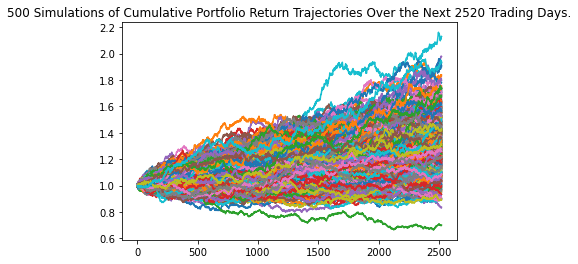

In [384]:
# Plot simulation outcomes
line_plot = MC_10year.plot_simulation()

line_plot.get_figure().savefig("10year_sim_plot.png", bbox_inches="tight")

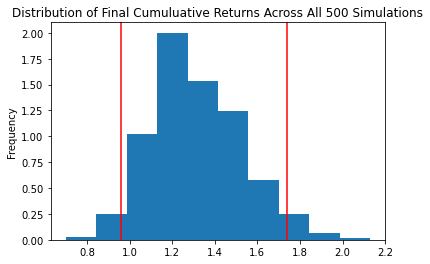

In [385]:
dist_plot2 = MC_10year.plot_distribution()

In [449]:
# Fetch summary statistics from the Monte Carlo simulation results
tb10 = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tb10)

count           500.000000
mean              1.318993
std               0.222861
min               0.678025
25%               1.157589
50%               1.306333
75%               1.469997
max               2.187640
95% CI Lower      0.928863
95% CI Upper      1.754196
Name: 2520, dtype: float64


In [451]:
# Set initial investment
initial_investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tb10[8]*60000,2)
ci_upper_ten = round(tb10[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $55731.8 and $105251.75
